In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
data_calc = pd.read_csv('../result/calc.csv',sep=' ', index_col=False)

In [53]:
data_calc

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,0.0,-0.001864,-0.005495,0.005802,0.494634,0.491168,0.49463,0.491138,0.985769
1,1000.0,0.075287,-0.046451,0.088463,500.342000,501.266000,500.33700,501.264000,1001.600000
2,2000.0,0.071984,-0.080280,0.107827,1009.590000,1004.430000,1009.58000,1004.430000,2014.010000
3,3000.0,0.164822,-0.192012,0.253051,1506.110000,1510.590000,1506.08000,1510.550000,3016.630000
4,4000.0,0.165357,-0.226398,0.280355,1996.470000,2015.670000,1996.45000,2015.620000,4012.060000
5,5000.0,0.069905,-0.149322,0.164875,2487.380000,2501.960000,2487.38000,2501.940000,4989.320000
6,6000.0,0.121786,-0.221047,0.252376,2974.750000,3000.020000,2974.74000,2999.970000,5974.710000
7,7000.0,0.076432,-0.108105,0.132395,3485.900000,3489.930000,3485.90000,3489.920000,6975.810000
8,8000.0,0.113377,-0.327466,0.346538,3986.310000,3977.180000,3986.30000,3977.080000,7963.370000
9,9000.0,0.029215,-0.325398,0.326707,4474.380000,4471.580000,4474.38000,4471.470000,8945.850000


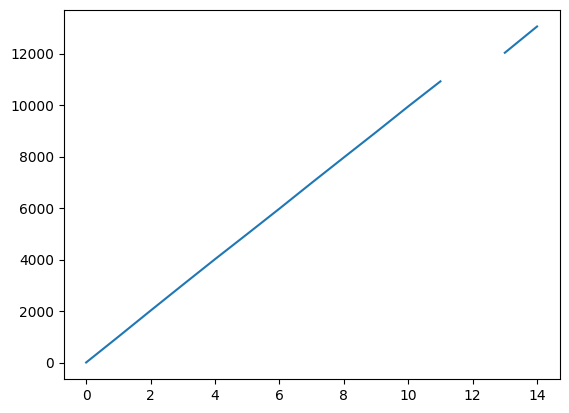

In [54]:
plt.plot(data_calc['<ΔR^2>'])

In [55]:
data_first_particle = pd.read_csv('../result/first_particle.csv',sep=' ', index_col=False)

In [56]:
data_first_particle

,x,y
0,-0.241371,0.000000
1,-0.241371,0.501844
2,-0.241371,-0.227982
3,-0.241371,0.210800
4,-0.241371,-0.493409
...,...,...
18271,-103.446000,81.759700
18272,-103.446000,82.500300
18273,-103.446000,82.742900
18274,-102.993000,82.742900


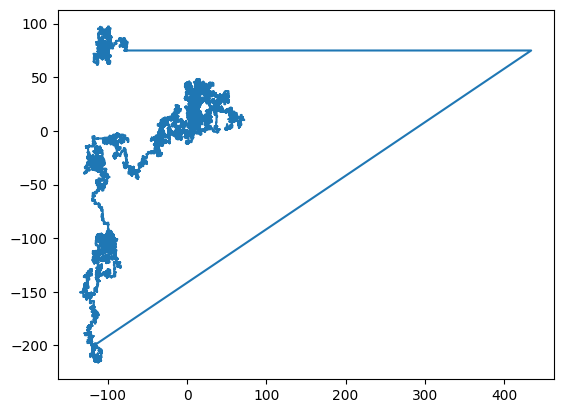

In [57]:
plt.plot(data_first_particle.x,data_first_particle.y)

In [ ]:
data_last_vals = pd.read_csv('../result/last_vals.csv',sep=' ', index_col=False)

In [33]:
data_last_vals

,x,y


C:\Users\aliya\CLionProjects\matmod-8sem\venv\Lib\site-packages\numpy\lib\_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


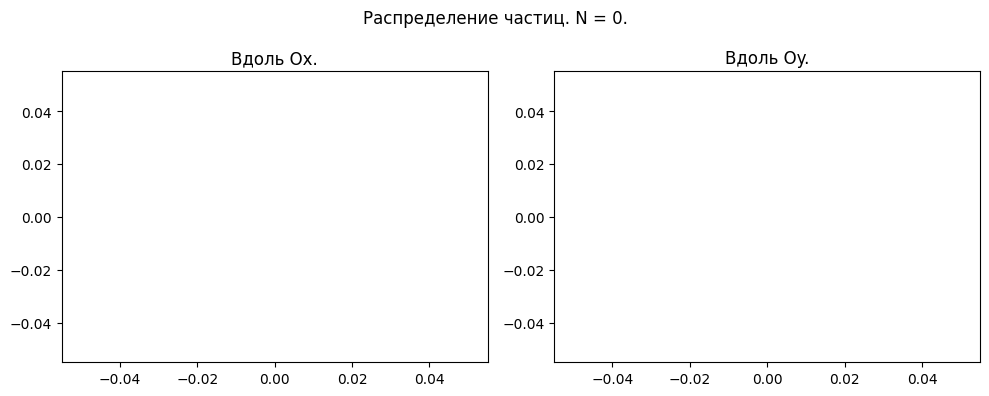

In [34]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частиц. N = {len(data_last_vals.x)}.')

plt.subplot(1,2,1)
plt.hist(data_last_vals.x, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e2, 1e2))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(data_last_vals.y, bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e2, 1e2))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()